In [2]:
import numpy as np
import tensorflow as tf

import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


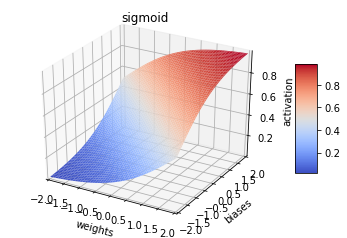

In [25]:
# TASK 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
range=2

# Computation graph
x = tf.placeholder(tf.float32)
w = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
output=tf.sigmoid(w*x+b)
loss = tf.reduce_sum(tf.square(output - y))
#loss=tf.nn.l2_loss(output-y)*2
# Calculate gradients
grad_x, grad_w, grad_b = tf.gradients(output, [x, w, b])



# Subtask 1
w_value=np.array([np.array([np.linspace(-range,range,100)])]).transpose([1, 0, 2])
b_value=np.array([np.array([np.linspace(-range,range,100)])]).transpose([1, 2, 0])

# Run graph
with tf.Session() as sess:
  feed_dict = {x: 1,
               y: .5,
               w: w_value,
               b: b_value}
  tf_out = sess.run([loss,output, grad_x, grad_w, grad_b], feed_dict=feed_dict)

    
surf=ax.plot_surface(w_value[0],b_value[0],tf_out[1][0],cmap=cm.coolwarm)
ax.set_title('sigmoid')
ax.set_xlim(-range,range)
ax.set_ylim(-range,range)
ax.set_xlabel('weights')
ax.set_ylabel('biases')
ax.set_zlabel('activation')
fig.colorbar(surf, shrink=0.5, aspect=5)


IndexError: invalid index to scalar variable.

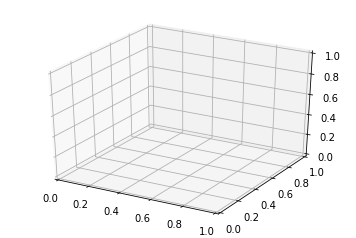

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Subtask 2
surf=ax.plot_surface(w_value[0],b_value[0],tf_out[0][0],cmap=cm.coolwarm)
ax.set_title('L2 loss')
ax.set_xlim(-range,range)
ax.set_ylim(-range,range)
ax.set_xlabel('weights')
ax.set_ylabel('biases')
ax.set_zlabel('loss')
fig.colorbar(surf, shrink=0.5, aspect=5)


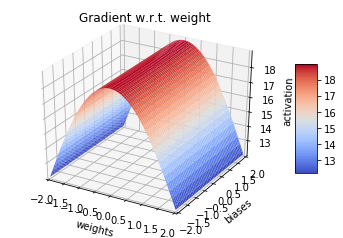

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Subtask 2
surf=ax.plot_surface(w_value,b_value,tf_out[3],cmap=cm.coolwarm)
ax.set_title('Gradient w.r.t. weight')
ax.set_xlim(-range,range)
ax.set_ylim(-range,range)
ax.set_xlabel('weights')
ax.set_ylabel('biases')
ax.set_zlabel('gradient')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [29]:
tf_out[0]

852.79016

In [37]:

W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y))
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in np.arange(1000):
    sess.run(train, {x: x_train, y:y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))


W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11
